# Finding the best markets to advertise in

In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned. 

We will clone the remote repository to our working directory using  
>git clone https://github.com/freeCodeCamp/2017-new-coder-survey.git

In [1]:
import pandas as pd

pd.options.display.max_columns = 150
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)  # low_memory = False to silence dtypes warning
print(fcc.shape)
fcc.head(3)

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
fcc.columns = fcc.columns.str.lower()
fcc.columns 

Index(['age', 'attendedbootcamp', 'bootcampfinish', 'bootcamploanyesno',
       'bootcampname', 'bootcamprecommend', 'childrennumber', 'citypopulation',
       'codeeventconferences', 'codeeventdjangogirls',
       ...
       'youtubefcc', 'youtubefunfunfunction', 'youtubegoogledev',
       'youtubelearncode', 'youtubeleveluptuts', 'youtubemit',
       'youtubemozillahacks', 'youtubeother', 'youtubesimplilearn',
       'youtubethenewboston'],
      dtype='object', length=136)

# Checking for sample representativity

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The jobroleinterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [3]:
jobroleinterest = pd.DataFrame(fcc['jobroleinterest'].value_counts(normalize=True)*100).reset_index()
jobroleinterest.rename({'index':'job'}, axis=1, inplace=True)
jobroleinterest.sample(20)

,job,jobroleinterest
2650,"User Experience Designer, Data Engineer, F...",0.014302
1661,"Front-End Web Developer, Full-Stack Web Deve...",0.014302
170,"Game Developer, Information Security",0.042906
2367,"Product Manager, Front-End Web Developer, ...",0.014302
1442,"Back-End Web Developer, Data Scientist, Full...",0.014302
3010,"Back-End Web Developer, Full-Stack Web Develop...",0.014302
1213,"Data Scientist, Data Engineer, Quality Ass...",0.014302
415,"Information Security, Front-End Web Developer",0.028604
537,"Back-End Web Developer, Mobile Developer, ...",0.014302
112,"Data Scientist, Back-End Web Developer, Full...",0.071510


The information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

- Split each string in the jobroleinterest column to find the number of options for each participant. (We'll first drop the null values because we can't split Nan values.)
- Generate a frequency table for the variable describing the number of options.

In [4]:
splitted_interests = fcc['jobroleinterest'].dropna().str.split(',')
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: jobroleinterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [5]:
interests_no_nulls = fcc['jobroleinterest'].dropna()
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer', regex=True)
freq_table = web_or_mobile.value_counts(normalize=True)*100

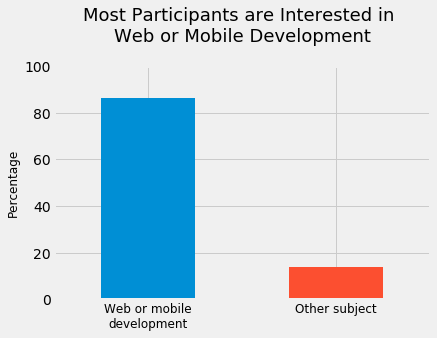

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',fontsize=18,
          y = 1.08) # y pads the title upward
# plt.legend([0,1],['web', 'mobile'])
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1], ['Web or mobile\ndevelopment', 'Other subject'], rotation=0, fontsize=12)
plt.ylim((0,100))
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

# New coders - locations and densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The <span style='color:red'>countrycitizen</span> variable describes the country of origin for each participant, and the <span style='color:red'>countrylive</span> variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the <span style='color:red'>countrylive</span> variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [7]:
fcc_answered = fcc[fcc['jobroleinterest'].notnull()].copy()
fcc_answered[['jobroleinterest', 'countrylive']].sample(3)

,jobroleinterest,countrylive
4042,"Mobile Developer, Game Developer, Full-Stack...",Canada
8687,Quality Assurance Engineer,United States of America
7255,"Quality Assurance Engineer, Mobile Develop...",India


In [8]:
ab_freq = fcc_answered['countrylive'].value_counts()
rl_freq = fcc_answered['countrylive'].value_counts(normalize=True)*100
freq_tb = pd.DataFrame({'absolute_frequency': ab_freq, 'relative_frequency (%)': rl_freq})
freq_tb.head()

,absolute_frequency,relative_frequency (%)
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

# Spending money for learning

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The <span style='color:red'>moneyforlearning</span> column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [9]:
fcc_answered[['moneyforlearning', 'monthsprogramming']].sample(3)

,moneyforlearning,monthsprogramming
9521,20000.0,12.0
3292,300.0,24.0
1556,0.0,12.0


In [10]:
fcc_answered['monthsprogramming'].replace(0, 1, inplace=True)
fcc_answered['moneypermonth'] = fcc_answered['moneyforlearning']/fcc_answered['monthsprogramming']
fcc_answered['moneypermonth'].isnull().sum()

675

Let's keep only the rows that don't have null values for the money_per_month column.

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the CountryLive column, and check out if we still have enough data for the four countries that interest us.

In [11]:
fcc_4_countries = fcc_answered[fcc_answered['countrylive'].str.contains(
    'United States of America|India|United Kingdom|Canada', na=False)].copy()

fcc_4_countries['countrylive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: countrylive, dtype: int64

In [12]:
fcc_4_countries['moneypermonth'].isnull().sum()

313

In [13]:
fcc_4_countries = fcc_4_countries[fcc_4_countries['moneypermonth'].notnull()].copy()
fcc_4_countries['moneypermonth'].isnull().sum()

0

In [14]:
countries_mean = pd.pivot_table(fcc_4_countries, index='countrylive', values='moneypermonth')
countries_mean.sort_values(by='moneypermonth', ascending=False)
# countries_mean = fcc_4_countries.groupby('countrylive').mean()
# countries_mean['moneypermonth'][['United States of America',
#                             'India', 'United Kingdom',
#                             'Canada']]

,moneypermonth
countrylive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443



The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

# Dealing with extrem outliers

Let's use box plots to visualize the distribution of the money_per_month variable for each country.

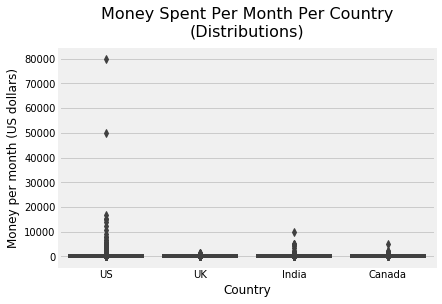

In [15]:
import seaborn as sns

sns.boxplot(data=fcc_4_countries, x='countrylive', y='moneypermonth')
plt.title('Money Spent Per Month Per Country\n(Distributions)', y=1.03,
         fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [16]:
fcc_4_countries = fcc_4_countries[fcc_4_countries['moneypermonth']<20000]
countries_mean = pd.pivot_table(fcc_4_countries, index='countrylive', values='moneypermonth')
countries_mean.sort_values(by='moneypermonth', ascending=False)

,moneypermonth
countrylive,
United States of America,183.800110
India,135.100982
Canada,113.510961
United Kingdom,45.534443


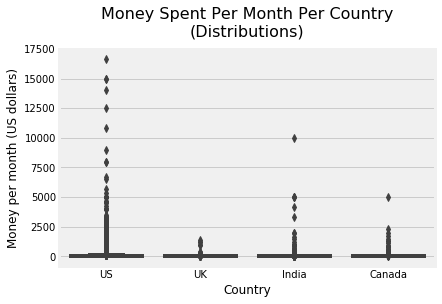

In [17]:
sns.boxplot(data=fcc_4_countries, x='countrylive', y='moneypermonth')
plt.title('Money Spent Per Month Per Country\n(Distributions)', y=1.03,
         fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [18]:
india_outlier = fcc_4_countries[(fcc_4_countries['countrylive']=='India')& 
                                (fcc_4_countries['moneypermonth'] >= 2500)]
india_outlier

,age,attendedbootcamp,bootcampfinish,bootcamploanyesno,bootcampname,bootcamprecommend,childrennumber,citypopulation,codeeventconferences,codeeventdjangogirls,codeeventfcc,codeeventgamejam,codeeventgirldev,codeeventhackathons,codeeventmeetup,codeeventnodeschool,codeeventnone,codeeventother,codeeventrailsbridge,codeeventrailsgirls,codeeventstartupwknd,codeeventwkdbootcamps,codeeventwomencode,codeeventworkshops,commutetime,countrycitizen,countrylive,employmentfield,employmentfieldother,employmentstatus,employmentstatusother,expectedearning,financiallysupporting,firstdevjob,gender,genderother,haschildren,hasdebt,hasfinancialdependents,hashighspdinternet,hashomemortgage,hasservedinmilitary,hasstudentdebt,homemortgageowe,hourslearning,id.x,id.y,income,isethnicminority,isreceivedisabilitiesbenefits,issoftwaredev,isunderemployed,jobapplywhen,jobinterestbackend,jobinterestdataengr,jobinterestdatasci,jobinterestdevops,jobinterestfrontend,jobinterestfullstack,jobinterestgamedev,jobinterestinfosec,jobinterestmobile,jobinterestother,jobinterestprojmngr,jobinterestqaengr,jobinterestux,jobpref,jobrelocateyesno,jobroleinterest,jobwherepref,languageathome,maritalstatus,moneyforlearning,monthsprogramming,networkid,part1endtime,part1starttime,part2endtime,part2starttime,podcastchangelog,podcastcodenewbie,podcastcodepen,podcastdevtea,podcastdotnet,podcastgiantrobots,podcastjsair,podcastjsjabber,podcastnone,podcastother,podcastprogthrowdown,podcastrubyrogues,podcastsedaily,podcastseradio,podcastshoptalk,podcasttalkpython,podcastthewebahead,resourcecodecademy,resourcecodewars,resourcecoursera,resourcecss,resourceedx,resourceegghead,resourcefcc,resourcehackerrank,resourceka,resourcelynda,resourcemdn,resourceodinproj,resourceother,resourcepluralsight,resourceskillcrush,resourceso,resourcetreehouse,resourceudacity,resourceudemy,resourcew3s,schooldegree,schoolmajor,studentdebtowe,youtubecodecourse,youtubecodingtrain,youtubecodingtut360,youtubecomputerphile,youtubederekbanas,youtubedevtips,youtubeengineeredtruth,youtubefcc,youtubefunfunfunction,youtubegoogledev,youtubelearncode,youtubeleveluptuts,youtubemit,youtubemozillahacks,youtubeother,youtubesimplilearn,youtubethenewboston,moneypermonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [19]:
fcc_4_countries.drop(india_outlier.index, inplace=True)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [20]:
us_outlier = fcc_4_countries[(fcc_4_countries['countrylive']=='United States of America')& 
                                (fcc_4_countries['moneypermonth'] >= 6000)]
us_outlier

,age,attendedbootcamp,bootcampfinish,bootcamploanyesno,bootcampname,bootcamprecommend,childrennumber,citypopulation,codeeventconferences,codeeventdjangogirls,codeeventfcc,codeeventgamejam,codeeventgirldev,codeeventhackathons,codeeventmeetup,codeeventnodeschool,codeeventnone,codeeventother,codeeventrailsbridge,codeeventrailsgirls,codeeventstartupwknd,codeeventwkdbootcamps,codeeventwomencode,codeeventworkshops,commutetime,countrycitizen,countrylive,employmentfield,employmentfieldother,employmentstatus,employmentstatusother,expectedearning,financiallysupporting,firstdevjob,gender,genderother,haschildren,hasdebt,hasfinancialdependents,hashighspdinternet,hashomemortgage,hasservedinmilitary,hasstudentdebt,homemortgageowe,hourslearning,id.x,id.y,income,isethnicminority,isreceivedisabilitiesbenefits,issoftwaredev,isunderemployed,jobapplywhen,jobinterestbackend,jobinterestdataengr,jobinterestdatasci,jobinterestdevops,jobinterestfrontend,jobinterestfullstack,jobinterestgamedev,jobinterestinfosec,jobinterestmobile,jobinterestother,jobinterestprojmngr,jobinterestqaengr,jobinterestux,jobpref,jobrelocateyesno,jobroleinterest,jobwherepref,languageathome,maritalstatus,moneyforlearning,monthsprogramming,networkid,part1endtime,part1starttime,part2endtime,part2starttime,podcastchangelog,podcastcodenewbie,podcastcodepen,podcastdevtea,podcastdotnet,podcastgiantrobots,podcastjsair,podcastjsjabber,podcastnone,podcastother,podcastprogthrowdown,podcastrubyrogues,podcastsedaily,podcastseradio,podcastshoptalk,podcasttalkpython,podcastthewebahead,resourcecodecademy,resourcecodewars,resourcecoursera,resourcecss,resourceedx,resourceegghead,resourcefcc,resourcehackerrank,resourceka,resourcelynda,resourcemdn,resourceodinproj,resourceother,resourcepluralsight,resourceskillcrush,resourceso,resourcetreehouse,resourceudacity,resourceudemy,resourcew3s,schooldegree,schoolmajor,studentdebtowe,youtubecodecourse,youtubecodingtrain,youtubecodingtut360,youtubecomputerphile,youtubederekbanas,youtubedevtips,youtubeengineeredtruth,youtubefcc,youtubefunfunfunction,youtubegoogledev,youtubelearncode,youtubeleveluptuts,youtubemit,youtubemozillahacks,youtubeother,youtubesimplilearn,youtubethenewboston,moneypermonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [21]:
us_outlier.shape

(11, 137)

In [22]:
us_outlier[['countrylive', 'attendedbootcamp', 'moneypermonth', 'monthsprogramming']].sort_values(by='monthsprogramming').reset_index()

,index,countrylive,attendedbootcamp,moneypermonth,monthsprogramming
0,718,United States of America,1.0,8000.000000,1.0
1,3184,United States of America,1.0,9000.000000,1.0
2,6805,United States of America,1.0,15000.000000,1.0
3,9778,United States of America,1.0,8000.000000,1.0
4,16997,United States of America,0.0,12500.000000,1.0
5,1222,United States of America,1.0,6500.000000,2.0
6,17231,United States of America,0.0,15000.000000,2.0
7,7505,United States of America,1.0,6666.666667,3.0
8,7198,United States of America,0.0,14000.000000,5.0
9,3930,United States of America,0.0,10833.333333,6.0


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

Didn't attend bootcamps.
Had been programming for three months or less when at the time they completed the survey.

In [24]:
us_outlier_unattended = fcc_4_countries[(fcc_4_countries['countrylive']=='United States of America')& 
                                (fcc_4_countries['moneypermonth'] >= 6000) &
                                       ((fcc_4_countries['attendedbootcamp'] == 0)|
                                       (fcc_4_countries['monthsprogramming'] <= 3))]
fcc_4_countries = fcc_4_countries.drop(us_outlier_unattended.index)


Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.

In [26]:
canada_outlier = fcc_4_countries[(fcc_4_countries['countrylive']=='Canada')& 
                                (fcc_4_countries['moneypermonth'] >= 5000)]
canada_outlier[['countrylive', 'attendedbootcamp', 'moneypermonth', 'monthsprogramming']]

,countrylive,attendedbootcamp,moneypermonth,monthsprogramming
13659,Canada,1.0,5000.0,2.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [28]:
fcc_4_countries = fcc_4_countries.drop(canada_outlier.index)

Let's recompute the mean values and generate the final box plots.

In [33]:
fcc_4_countries.groupby('countrylive').mean()['moneypermonth'].sort_values(ascending=False)

countrylive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: moneypermonth, dtype: float64

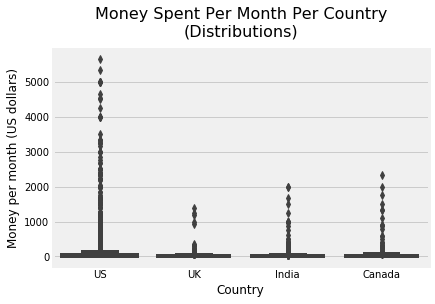

In [34]:
sns.boxplot(data=fcc_4_countries, x='countrylive', y='moneypermonth')
plt.title('Money Spent Per Month Per Country\n(Distributions)', y=1.03,
         fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# Choosing the two best markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [35]:
fcc_4_countries['countrylive'].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: countrylive, dtype: int64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

  - 60% for the US, 25% for India, 15% for Canada.
  - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

  - 70% for the US, and 30% for India.
  - 65% for the US, and 35% for Canada; etc.
  - Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

Furthermore, we can find other criteria for choosing the best market or analyse other data sets:
- [freeCodeCamp's 2016 New Coders Survey](https://github.com/freeCodeCamp/2016-new-coder-survey).
- [Stack Overflow 2018 Developer Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey).